0.9940978288261526


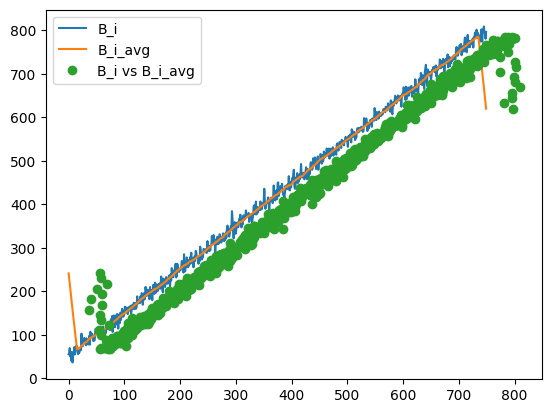

In [1]:
# Write a script to understand the concept of correlation curves as it pertains to bfactor refinement
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Assume a one dimensional array of 1000 points

B_i = np.arange(50, 800).astype(np.float)
# add some noise to the array
B_i += np.random.normal(0, 10, B_i.shape)

# Calculate the average value around each point in the array
# this is basically a moving average
window_size = 30
B_i_avg_raw = np.convolve(np.pad(B_i, window_size, 'mean'), np.ones((window_size,))/window_size, mode='valid')
B_i_avg = B_i_avg_raw[window_size//2:-window_size//2-1]

# Calculate the correlation coefficient between the two arrays
r_val, p_val = pearsonr(B_i, B_i_avg)

# Plot the two arrays
plt.plot(B_i, label='B_i')
plt.plot(B_i_avg, label='B_i_avg')
plt.plot(B_i, B_i_avg, 'o', label='B_i vs B_i_avg')
plt.legend()
print(r_val)